# JZ-pag

**Goal:** Start using some of the JZ slices for some basic R&D for what the jet selection accuracies for pairAGraph look like.

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import json
from itertools import product
from glob import glob
import uproot

import matplotlib.pyplot as plt
from matplotlib import gridspec

import os

os.sys.path.append('../code/')
from plotting import SR_x, SR_y1, SR_y2
from plotting import CR_x, CR_y1, CR_y2
from plotting import SB_x, SB_y1, SB_y2

# Let's do ATLAS style plots too!
import matplotlib as mpl
os.sys.path.append( "../PyATLASstyle/")
import PyATLASstyle as pas
pas.applyATLASstyle(mpl)

%load_ext autoreload
%autoreload 2

Running w/ conda env: don't import root packages.


../PyATLASstyle/PyATLASstyle.py:12: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


### Load in the samples

In [5]:
physicsSample = 'SMNR'
prodTag = 'HLLHC'
mc = 'mc16d'

In [44]:
cols = ['m_hh','mc_sf','m_h1','m_h2','njets','ntag','abs_deta_hh','X_wt','kinematic_region']
cols += [f'Db_h{i}_j{j}' for i,j in product([1,2],[1,2])]
dR1 = pd.concat([pd.read_parquet(f'../data/JZ{i}_{mc}-{prodTag}/df_min_dR1_3b_Db_sort.parquet',columns=cols) for i in [2,3,4]])


In [45]:
cols = ['m_hh','mc_sf','m_h1','m_h2','njets','ntag','ntag_pag','abs_deta_hh','X_wt']
cols += [f'Db_h{i}_j{j}' for i,j in product([1,2],[1,2])]

pag_Db = pd.concat([pd.read_parquet(f'../data/JZ{i}_{mc}-{prodTag}-5jets/df_preLN_lr_0p003_3b_Db_sort.parquet') for i in [2,3,4]])
pag_btag = pd.concat([pd.read_parquet(f'../data/JZ{i}_{mc}-{prodTag}-5jets/df_btag_5j_3b_Db_sort.parquet') for i in [2,3,4]])

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


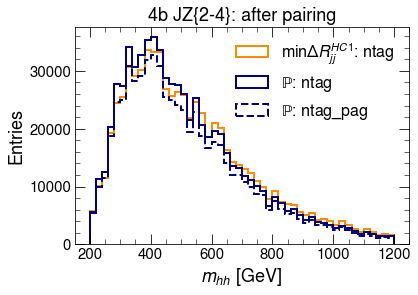

In [37]:
nb = 50
r = (200,1200)

plt.hist(dR1.loc[dR1.ntag>=4,'m_hh'],nb,r,histtype='step',lw=2,ls='-',color='darkorange',
         weights=dR1.loc[dR1.ntag>=4,'mc_sf'],label='$\min \Delta R_{jj}^{HC 1}$: ntag')

plt.hist(pag_Db.loc[pag_Db.ntag>=4,'m_hh'],nb,r,histtype='step',lw=2,ls='-',color='navy',
         weights=pag_Db.loc[pag_Db.ntag>=4,'mc_sf'],label='$\mathrm{\mathbb{P}}$: ntag')

plt.hist(pag_Db.loc[pag_Db.ntag_pag==4,'m_hh'],nb,r,histtype='step',lw=2,ls='--',color='navy',
         weights=pag_Db.loc[pag_Db.ntag_pag==4,'mc_sf'],label='$\mathrm{\mathbb{P}}$: ntag_pag')

# plt.hist(pag_btag.loc[pag_btag.ntag>=4,'m_hh'],nb,r,histtype='step',lw=2,ls='-',color='turquoise',
#          weights=pag_btag.loc[pag_btag.ntag>=4,'mc_sf'],label='$\mathrm{\mathbb{P}}$: ntag')

# plt.hist(pag_btag.loc[pag_btag.ntag_pag==4,'m_hh'],nb,r,histtype='step',lw=2,ls='--',color='turquoise',
#          weights=pag_btag.loc[pag_btag.ntag_pag==4,'mc_sf'],label='$\mathrm{\mathbb{P}}$: ntag_pag')

plt.xlabel('$m_{hh}$ [GeV]',fontsize=18)
plt.ylabel('Entries',fontsize=18)
plt.title('4b JZ{2-4}: after pairing')
plt.legend(fontsFor ize=16)
plt.show()

In [56]:
m1s = [dR1.abs_deta_hh < 1.5, (dR1.abs_deta_hh < 1.5) & (dR1.X_wt > 1.5)]
m1s = m1s + [m1s[-1] & (dR1.kinematic_region==i) for i in range(3)]

m2s = [pag_Db.abs_deta_hh < 1.5, (pag_Db.abs_deta_hh < 1.5) & (pag_Db.X_wt > 1.5)]
m2s = m1s + [m1s[-1] & (pag_Db.kinematic_region==i) for i in range(3)]

titles = ['$|\Delta \eta_{hh}| < 1.5|$','$X_{wt}$ > 1.5','SR','CR','VR']

$|\Delta \eta_{hh}| < 1.5|$ 0.9108784863230928
$X_{wt}$ > 1.5 0.9077025301232658
SR 0.9977109771469417
CR 0.9880582237699173
VR 0.9863166219431595


Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


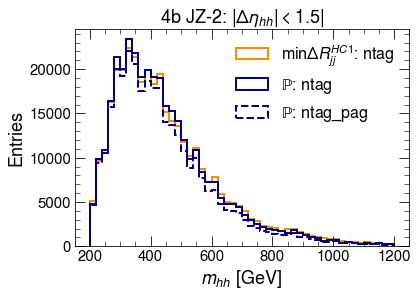

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


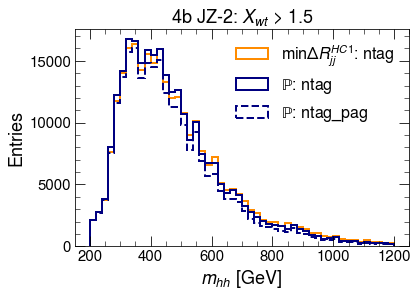

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


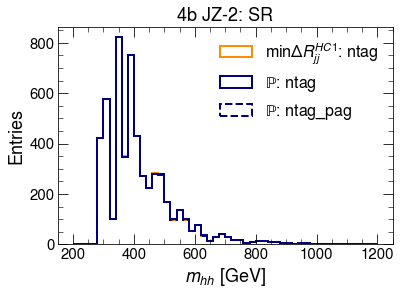

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


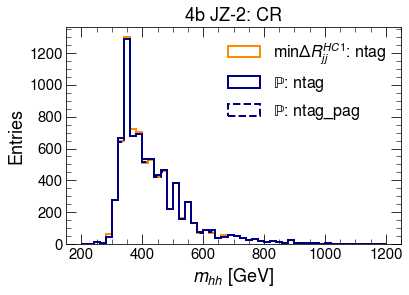

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


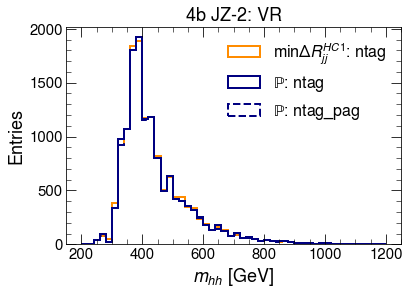

In [57]:
for m1,m2,title in zip(m1s, m2s, titles):
 
    plt.figure()
    plt.hist(dR1.loc[(dR1.ntag>=4) & m1,'m_hh'],nb,r,histtype='step',lw=2,ls='-',color='darkorange',
             weights=dR1.loc[(dR1.ntag>=4) & m1,'mc_sf'],label='$\min \Delta R_{jj}^{HC 1}$: ntag')

    plt.hist(pag_Db.loc[(pag_Db.ntag>=4) & m2,'m_hh'],nb,r,histtype='step',lw=2,ls='-',color='navy',
             weights=pag_Db.loc[(pag_Db.ntag>=4) & m2,'mc_sf'],label='$\mathrm{\mathbb{P}}$: ntag')

    plt.hist(pag_Db.loc[(pag_Db.ntag_pag==4) & m2,'m_hh'],nb,r,histtype='step',lw=2,ls='--',color='navy',
             weights=pag_Db.loc[(pag_Db.ntag_pag==4) & m2,'mc_sf'],label='$\mathrm{\mathbb{P}}$: ntag_pag')

    # plt.hist(pag_btag.loc[pag_btag.ntag>=4,'m_hh'],nb,r,histtype='step',lw=2,ls='-',color='turquoise',
    #          weights=pag_btag.loc[pag_btag.ntag>=4,'mc_sf'],label='$\mathrm{\mathbb{P}}$: ntag')

    # plt.hist(pag_btag.loc[pag_btag.ntag_pag==4,'m_hh'],nb,r,histtype='step',lw=2,ls='--',color='turquoise',
    #          weights=pag_btag.loc[pag_btag.ntag_pag==4,'mc_sf'],label='$\mathrm{\mathbb{P}}$: ntag_pag')

    plt.xlabel('$m_{hh}$ [GeV]',fontsize=18)
    plt.ylabel('Entries',fontsize=18)
    plt.title(f'4b JZ{2-4}: {title}')
    plt.legend(fontsize=16)
    
    
    num = np.sum(pag_Db.loc[(pag_Db.ntag_pag>=4) & m2,'mc_sf'])
    den = np.sum(pag_Db.loc[(pag_Db.ntag>=4) & m2,'mc_sf'])

    print(title, num / den)
    
plt.show()

**Lesson:** I don't think any kind of region optimization is going to be worthwhile with JZ samples, they're too granular.

### 3b investigations

Ok, the *biggest* Q I'm trying to get a first A to at this point is
(1) What's the difference in the B yield for the 3b + 1 loose vs 3b not loose categories, and with the two separate versions of the trainings?


$|\Delta \eta_{hh}| < 1.5|$ 0.9108784863230928
$X_{wt}$ > 1.5 0.9077025301232658
SR 0.9977109771469417
CR 0.9880582237699173
VR 0.9863166219431595


Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


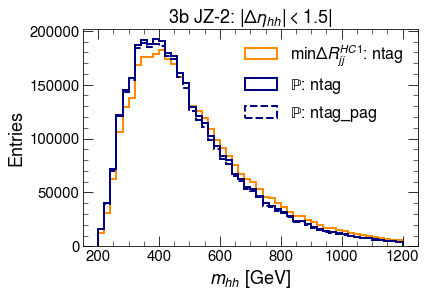

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


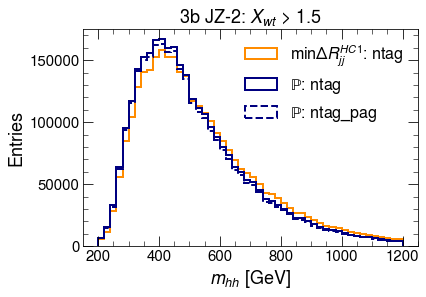

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


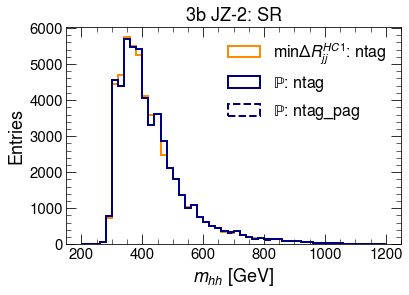

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


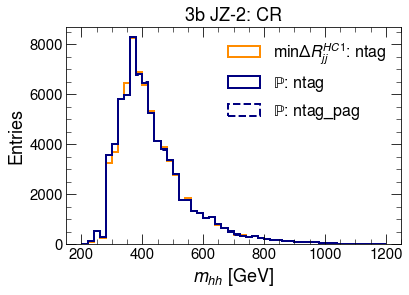

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


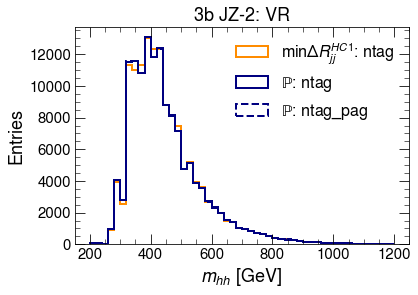

In [60]:
for m1,m2,title in zip(m1s, m2s, titles):
 
    plt.figure()
    plt.hist(dR1.loc[(dR1.ntag==3) & m1,'m_hh'],nb,r,histtype='step',lw=2,ls='-',color='darkorange',
             weights=dR1.loc[(dR1.ntag==3) & m1,'mc_sf'],label='$\min \Delta R_{jj}^{HC 1}$: ntag')

    plt.hist(pag_Db.loc[(pag_Db.ntag==3) & m2,'m_hh'],nb,r,histtype='step',lw=2,ls='-',color='navy',
             weights=pag_Db.loc[(pag_Db.ntag==3) & m2,'mc_sf'],label='$\mathrm{\mathbb{P}}$: ntag')

    plt.hist(pag_Db.loc[(pag_Db.ntag_pag==3) & m2,'m_hh'],nb,r,histtype='step',lw=2,ls='--',color='navy',
             weights=pag_Db.loc[(pag_Db.ntag_pag==3) & m2,'mc_sf'],label='$\mathrm{\mathbb{P}}$: ntag_pag')

    plt.xlabel('$m_{hh}$ [GeV]',fontsize=18)
    plt.ylabel('Entries',fontsize=18)
    plt.title(f'3b JZ{2-4}: {title}')
    plt.legend(fontsize=16)
    
    
    num = np.sum(pag_Db.loc[(pag_Db.ntag_pag>=4) & m2,'mc_sf'])
    den = np.sum(pag_Db.loc[(pag_Db.ntag>=4) & m2,'mc_sf'])

    print(title, num / den)
    
plt.show()

Should I break down the total yields?

In [61]:
titles

['$|\\Delta \\eta_{hh}| < 1.5|$', '$X_{wt}$ > 1.5', 'SR', 'CR', 'VR']

In [62]:
np.sum(pag_Db.loc[(pag_Db.ntag==3) & m2s[1],'mc_sf'])

3095309.100422223

In [64]:
pag_Db['Db_min_pag'] = np.min(pag_Db[[f'Db_h{i}_j{j}' for i,j in product([1,2],[1,2])]].values,axis=1)

In [68]:
np.sum(pag_Db.loc[(pag_Db.ntag==3) & (pag_Db.Db_min_pag==2) & m2s[1],'mc_sf']), np.sum(pag_Db.loc[(pag_Db.ntag==3) & (pag_Db.Db_min_pag==1) & m2s[1],'mc_sf'])

(187187.26068756133, 2908121.8397346614)

In [70]:
187187.26 + 2908121.83

3095309.09

In [71]:
np.sum(pag_Db.loc[(pag_Db.ntag==3) & (pag_Db.Db_min_pag==2) & m2s[2],'mc_sf']), np.sum(pag_Db.loc[(pag_Db.ntag==3) & (pag_Db.Db_min_pag==1) & m2s[2],'mc_sf'])

(5401.860849539777, 47550.287081559225)

In [72]:
5401.860849539777 / (5401.860849539777+ 47550.287081559225)

0.10201400812991843

In [2]:
import dask.dataframe as dd

In [4]:
?dd.read_parquet

In [7]:
# my_dd = dd.read_parquet('../data/data17-JUN20-5jets/files/df_btag_5j_3b_Db_sort_period?_00*.parquet')

In [9]:
?dd.read_parquet

In [16]:
my_dd = dd.read_parquet('../data/data17-JUN20-5jets/files/df_btag_5j_3b_Db_sort_periodI_00*.parquet')

In [17]:
my_dd.head()

run_number  event_number  mc_sf  ntag  cosThetaStar  kinematic_region  \
entry                                                                          
18         337107     410980098      1   3.0      0.033483                 2   
40         337107     410862492      1   3.0     -0.450397                 3   
44         337107     411054383      1   3.0     -0.680149                 3   
69         337107     410227169      1   4.0      0.145746                 3   
80         337107     410566297      1   3.0     -0.502187                 3   

             m_hh    m_hh_cor  chosenPair          HT  ...  ntag_pag  \
entry                                                  ...             
18     321.092645  291.281588         1.0  298.993599  ...         3   
40     344.532518  264.559857        12.0  314.443073  ...         2   
44     485.622353  449.053638         2.0  391.851433  ...         3   
69     274.316884  368.966796         1.0  256.326641  ...         4   
80     618.564715  682.310835         0.0  509.759598  ...         3   

       max_prob  idx_h1_j1  idx_h1_j2  idx_h2_j1  idx_h2_j2  \
entry                                                         
18     0.665835          3          1          0          2   
40     0.728084          2          1          4          3   
44     0.746095          3          0          1          2   
69     0.416283          0          2          1          3   
80     0.999998          2          3          1          0   

       HLT_2j15_gsc35_bmv2c1040_split_2j15_gsc35_boffperf_split_L14J15.0ETA25  \
entry                                                                           
18                                                  True                        
40                                                  True                        
44                                                  True                        
69                                                  True                        
80                                                 False                        

       HLT_2j35_gsc55_bmv2c1050_split_ht300_L1HT190-J15s5.ETA21  \
entry                                                             
18                                                 False          
40                                                 False          
44                                                  True          
69                                                 False          
80                                                  True          

       HLT_j110_gsc150_boffperf_split_2j35_gsc55_bmv2c1070_split_L1J85_3J30  \
entry                                                                         
18                                                 False                      
40                                                 False                      
44                                                  True                      
69                                                 False                      
80                                                  True                      

       HLT_j225_gsc300_bmv2c1070_split  
entry                                   
18                               False  
40                               False  
44                               False  
69                               False  
80                               False  

[5 rows x 58 columns]

In [41]:
my_dd = dd.read_parquet('../data/data17-JUN20-5jets/files/df_btag_5j_3b_Db_sort_periodI_00*.parquet',
                        filters=[('kinematic_region','<',2.5)])

my_dd.head()

run_number  event_number  mc_sf  ntag  cosThetaStar  kinematic_region  \
entry                                                                          
18         337107     410980098      1   3.0      0.033483                 2   
40         337107     410862492      1   3.0     -0.450397                 3   
44         337107     411054383      1   3.0     -0.680149                 3   
69         337107     410227169      1   4.0      0.145746                 3   
80         337107     410566297      1   3.0     -0.502187                 3   

             m_hh    m_hh_cor  chosenPair          HT  ...  ntag_pag  \
entry                                                  ...             
18     321.092645  291.281588         1.0  298.993599  ...         3   
40     344.532518  264.559857        12.0  314.443073  ...         2   
44     485.622353  449.053638         2.0  391.851433  ...         3   
69     274.316884  368.966796         1.0  256.326641  ...         4   
80     618.564715  682.310835         0.0  509.759598  ...         3   

       max_prob  idx_h1_j1  idx_h1_j2  idx_h2_j1  idx_h2_j2  \
entry                                                         
18     0.665835          3          1          0          2   
40     0.728084          2          1          4          3   
44     0.746095          3          0          1          2   
69     0.416283          0          2          1          3   
80     0.999998          2          3          1          0   

       HLT_2j15_gsc35_bmv2c1040_split_2j15_gsc35_boffperf_split_L14J15.0ETA25  \
entry                                                                           
18                                                  True                        
40                                                  True                        
44                                                  True                        
69                                                  True                        
80                                                 False                        

       HLT_2j35_gsc55_bmv2c1050_split_ht300_L1HT190-J15s5.ETA21  \
entry                                                             
18                                                 False          
40                                                 False          
44                                                  True          
69                                                 False          
80                                                  True          

       HLT_j110_gsc150_boffperf_split_2j35_gsc55_bmv2c1070_split_L1J85_3J30  \
entry                                                                         
18                                                 False                      
40                                                 False                      
44                                                  True                      
69                                                 False                      
80                                                  True                      

       HLT_j225_gsc300_bmv2c1070_split  
entry                                   
18                               False  
40                               False  
44                               False  
69                               False  
80                               False  

[5 rows x 58 columns]

In [27]:
my_dd = dd.read_parquet('../data/data17-JUN20-5jets/files/df_btag_5j_3b_Db_sort_periodI_00*.parquet',
                        filters=[[('kinematic_region','<',3),('abs_deta_hh','>',1.5)]])

In [28]:
my_dd.head()

/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/dask/dataframe/core.py:6045: UserWarning: Insufficient elements for `head`. 5 elements requested, only 0 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(msg.format(n, len(r)))


Empty DataFrame
Columns: [run_number, event_number, mc_sf, ntag, cosThetaStar, kinematic_region, m_hh, m_hh_cor, chosenPair, HT, MDR, MDpT, abs_deta_hh, Xhh, HT_all, lead_pt, lead_tag, bucket, pT_h1, eta_h1, phi_h1, m_h1, dRjj_h1, dPhi_h1, pT_h2, eta_h2, phi_h2, m_h2, dRjj_h2, dPhi_h2, Db_h1_j1, Db_h1_j2, Db_h2_j1, Db_h2_j2, njets, pT_2, pT_4, eta_i, dRjj_1, dRjj_2, pt_hh, X_wt, X_wt_old, j0_Db, j1_Db, j2_Db, j3_Db, j4_Db, ntag_pag, max_prob, idx_h1_j1, idx_h1_j2, idx_h2_j1, idx_h2_j2, HLT_2j15_gsc35_bmv2c1040_split_2j15_gsc35_boffperf_split_L14J15.0ETA25, HLT_2j35_gsc55_bmv2c1050_split_ht300_L1HT190-J15s5.ETA21, HLT_j110_gsc150_boffperf_split_2j35_gsc55_bmv2c1070_split_L1J85_3J30, HLT_j225_gsc300_bmv2c1070_split]
Index: []

[0 rows x 58 columns]

Alright - turns out this `filters` kwarg only will load the partition if it has *any* events satisfying the partition, it doesn't do any filtering w/in the partition.

In [42]:
my_dd = dd.read_parquet('../data/data17-JUN20-5jets/files/df_btag_5j_3b_Db_sort_periodI_00*.parquet')

In [45]:
my_dd[(my_dd.kinematic_region!=3)].head()

run_number  event_number  mc_sf  ntag  cosThetaStar  kinematic_region  \
entry                                                                          
18         337107     410980098      1   3.0      0.033483                 2   
175        337107     410418531      1   3.0     -0.958378                 1   
268        337107     406902467      1   3.0     -0.111217                 2   
382        337107     406757955      1   3.0      0.602789                 2   
620        337107     407829680      1   4.0     -0.449440                 0   

             m_hh    m_hh_cor  chosenPair          HT  ...  ntag_pag  \
entry                                                  ...             
18     321.092645  291.281588         1.0  298.993599  ...         3   
175    642.682630  255.456324         2.0  294.909565  ...         3   
268    367.342505  327.849608         0.0  356.758308  ...         3   
382    391.433043  355.797854         0.0  329.359085  ...         3   
620    424.152506  269.626673         2.0  385.553635  ...         4   

       max_prob  idx_h1_j1  idx_h1_j2  idx_h2_j1  idx_h2_j2  \
entry                                                         
18     0.665835          3          1          0          2   
175    1.000000          0          3          1          2   
268    0.827798          3          2          0          1   
382    0.998393          0          1          2          3   
620    0.999961          0          3          1          2   

       HLT_2j15_gsc35_bmv2c1040_split_2j15_gsc35_boffperf_split_L14J15.0ETA25  \
entry                                                                           
18                                                  True                        
175                                                 True                        
268                                                 True                        
382                                                 True                        
620                                                 True                        

       HLT_2j35_gsc55_bmv2c1050_split_ht300_L1HT190-J15s5.ETA21  \
entry                                                             
18                                                 False          
175                                                False          
268                                                False          
382                                                False          
620                                                 True          

       HLT_j110_gsc150_boffperf_split_2j35_gsc55_bmv2c1070_split_L1J85_3J30  \
entry                                                                         
18                                                 False                      
175                                                False                      
268                                                False                      
382                                                False                      
620                                                False                      

       HLT_j225_gsc300_bmv2c1070_split  
entry                                   
18                               False  
175                              False  
268                              False  
382                              False  
620                              False  

[5 rows x 58 columns]

In [46]:
my_dd[(my_dd['kinematic_region']!=3) & (my_dd['abs_deta_hh'] > 1.5)].head()

run_number  event_number  mc_sf  ntag  cosThetaStar  kinematic_region  \
entry                                                                          
175        337107     410418531      1   3.0     -0.958378                 1   
1414       337107     544033738      1   3.0      0.991272                 0   
1422       337107     542921374      1   3.0     -0.842846                 2   
1551       337107     544538564      1   3.0      0.934174                 2   
1664       337107     542636943      1   3.0      0.861583                 2   

             m_hh    m_hh_cor  chosenPair          HT  ...  ntag_pag  \
entry                                                  ...             
175    642.682630  255.456324         2.0  294.909565  ...         3   
1414   374.362735  273.389093         0.0  226.420563  ...         3   
1422   422.628227  300.498118         2.0  296.873169  ...         3   
1551   405.668956  291.206600         2.0  285.765320  ...         3   
1664   495.456683  299.118210         0.0  323.186890  ...         3   

       max_prob  idx_h1_j1  idx_h1_j2  idx_h2_j1  idx_h2_j2  \
entry                                                         
175    1.000000          0          3          1          2   
1414   0.997979          2          3          0          1   
1422   0.472069          3          0          1          2   
1551   0.852570          0          3          2          1   
1664   0.994669          0          1          3          2   

       HLT_2j15_gsc35_bmv2c1040_split_2j15_gsc35_boffperf_split_L14J15.0ETA25  \
entry                                                                           
175                                                 True                        
1414                                                True                        
1422                                                True                        
1551                                                True                        
1664                                                True                        

       HLT_2j35_gsc55_bmv2c1050_split_ht300_L1HT190-J15s5.ETA21  \
entry                                                             
175                                                False          
1414                                               False          
1422                                               False          
1551                                               False          
1664                                               False          

       HLT_j110_gsc150_boffperf_split_2j35_gsc55_bmv2c1070_split_L1J85_3J30  \
entry                                                                         
175                                                False                      
1414                                               False                      
1422                                               False                      
1551                                               False                      
1664                                               False                      

       HLT_j225_gsc300_bmv2c1070_split  
entry                                   
175                              False  
1414                             False  
1422                             False  
1551                             False  
1664                             False  

[5 rows x 58 columns]

In [58]:
selStr = 'kinematic_region!=3,abs_deta_hh>1.5'

cuts = selStr.split(',')
cuts

['kinematic_region!=3', 'abs_deta_hh>1.5']

In [52]:
import operator #as SmoothOperator 

In [83]:
def cutTuple(cut):
    '''
    Given a cut string, returns a tuple with the 
    (df column, operator, value)
    needed to implement the mask.
    
    Also return the opStr 
    
    '''
    
    if '!=' in cut:
        op = operator.ne
        col, val = cut.split('!=')
    
        cutStr = cut.replace('!=','ne')

    elif '<' in cut:
        op = operator.lt
        col, val = cut.split('<')  
        
        cutStr = cut.replace('<','lt')
        
    elif '>' in cut:
        op = operator.gt
        col, val = cut.split('>')  
        
        cutStr = cut.replace('>','gt')
        
    else:
        print('op not found in string',cut)
        raise NotImplementedError
    
    return col, op, float(val), cutStr

In [97]:
import pyarrow.parquet as pq
import pyarrow as pa

In [99]:
pd = pd.DataFrame()

In [100]:
?pd.to_parquet

In [98]:
?pa.Table.from_pandas

In [96]:
?pq.write_table

In [77]:
col, op, val = cutTuple( cuts[0] )

In [78]:
col, op, val

('kinematic_region', <function _operator.ne(a, b, /)>, 3.0)

In [80]:
mask = True

mask = op(my_dd[col], val)

In [82]:
mask.compute()

entry
18         True
40        False
44        False
69        False
80        False
          ...  
219539    False
219561    False
219580    False
219623    False
219673    False
Name: kinematic_region, Length: 6829, dtype: bool

In [93]:
120*1.05 + 45

171.0

In [92]:
110*1.05 + 45

160.5

In [79]:
my_dd[op(my_dd[col], val)].head()

run_number  event_number  mc_sf  ntag  cosThetaStar  kinematic_region  \
entry                                                                          
18         337107     410980098      1   3.0      0.033483                 2   
175        337107     410418531      1   3.0     -0.958378                 1   
268        337107     406902467      1   3.0     -0.111217                 2   
382        337107     406757955      1   3.0      0.602789                 2   
620        337107     407829680      1   4.0     -0.449440                 0   

             m_hh    m_hh_cor  chosenPair          HT  ...  ntag_pag  \
entry                                                  ...             
18     321.092645  291.281588         1.0  298.993599  ...         3   
175    642.682630  255.456324         2.0  294.909565  ...         3   
268    367.342505  327.849608         0.0  356.758308  ...         3   
382    391.433043  355.797854         0.0  329.359085  ...         3   
620    424.152506  269.626673         2.0  385.553635  ...         4   

       max_prob  idx_h1_j1  idx_h1_j2  idx_h2_j1  idx_h2_j2  \
entry                                                         
18     0.665835          3          1          0          2   
175    1.000000          0          3          1          2   
268    0.827798          3          2          0          1   
382    0.998393          0          1          2          3   
620    0.999961          0          3          1          2   

       HLT_2j15_gsc35_bmv2c1040_split_2j15_gsc35_boffperf_split_L14J15.0ETA25  \
entry                                                                           
18                                                  True                        
175                                                 True                        
268                                                 True                        
382                                                 True                        
620                                                 True                        

       HLT_2j35_gsc55_bmv2c1050_split_ht300_L1HT190-J15s5.ETA21  \
entry                                                             
18                                                 False          
175                                                False          
268                                                False          
382                                                False          
620                                                 True          

       HLT_j110_gsc150_boffperf_split_2j35_gsc55_bmv2c1070_split_L1J85_3J30  \
entry                                                                         
18                                                 False                      
175                                                False                      
268                                                False                      
382                                                False                      
620                                                False                      

       HLT_j225_gsc300_bmv2c1070_split  
entry                                   
18                               False  
175                              False  
268                              False  
382                              False  
620                              False  

[5 rows x 58 columns]

In [85]:
mask, cutStr = getMask(my_dd,selStr)

In [87]:
my_dd[mask].head()

run_number  event_number  mc_sf  ntag  cosThetaStar  kinematic_region  \
entry                                                                          
175        337107     410418531      1   3.0     -0.958378                 1   
1414       337107     544033738      1   3.0      0.991272                 0   
1422       337107     542921374      1   3.0     -0.842846                 2   
1551       337107     544538564      1   3.0      0.934174                 2   
1664       337107     542636943      1   3.0      0.861583                 2   

             m_hh    m_hh_cor  chosenPair          HT  ...  ntag_pag  \
entry                                                  ...             
175    642.682630  255.456324         2.0  294.909565  ...         3   
1414   374.362735  273.389093         0.0  226.420563  ...         3   
1422   422.628227  300.498118         2.0  296.873169  ...         3   
1551   405.668956  291.206600         2.0  285.765320  ...         3   
1664   495.456683  299.118210         0.0  323.186890  ...         3   

       max_prob  idx_h1_j1  idx_h1_j2  idx_h2_j1  idx_h2_j2  \
entry                                                         
175    1.000000          0          3          1          2   
1414   0.997979          2          3          0          1   
1422   0.472069          3          0          1          2   
1551   0.852570          0          3          2          1   
1664   0.994669          0          1          3          2   

       HLT_2j15_gsc35_bmv2c1040_split_2j15_gsc35_boffperf_split_L14J15.0ETA25  \
entry                                                                           
175                                                 True                        
1414                                                True                        
1422                                                True                        
1551                                                True                        
1664                                                True                        

       HLT_2j35_gsc55_bmv2c1050_split_ht300_L1HT190-J15s5.ETA21  \
entry                                                             
175                                                False          
1414                                               False          
1422                                               False          
1551                                               False          
1664                                               False          

       HLT_j110_gsc150_boffperf_split_2j35_gsc55_bmv2c1070_split_L1J85_3J30  \
entry                                                                         
175                                                False                      
1414                                               False                      
1422                                               False                      
1551                                               False                      
1664                                               False                      

       HLT_j225_gsc300_bmv2c1070_split  
entry                                   
175                              False  
1414                             False  
1422                             False  
1551                             False  
1664                             False  

[5 rows x 58 columns]